# NetworkX Tutorial

In [1]:
import networkx as nx
G = nx.Graph()

### Adding a node

In [3]:
G.add_node(1)
#or from a list:
G.add_nodes_from([2, 3])
#You can also add nodes along with node attributes if your container yields 2-tuples of the form
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

### Nodes from one graph can be added to another

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

### Our G can be grown by adding edges

In [6]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

#### Adding list of edges:

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

#### We can clear nodes:

In [8]:
G.clear()

#### And add nodes while ignoring already exsisting  nodes:

In [9]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

### We can easily inspect the nodes and edges of a graph

In [11]:
print(G.number_of_nodes())
G.number_of_edges()

8


3

## Examining Graphs

In [13]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
G.degree[1]  # the number of edges incident to 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]


2

### Removing Elements

In [14]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

### Using Constructors

In [15]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

[(1, 2), (2, 1)]


### Accessing Constructors

In [16]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
G[1][2]
G.edges[1, 2]

{'color': 'yellow'}

In [17]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [18]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [19]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


### Adding Attributes

In [20]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [21]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

#### Node Attributes

In [22]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1] #{'time': '5pm'}
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

#### Edge Attributes 

In [23]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

## Directed Graph

In [24]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight') #0.5
DG.degree(1, weight='weight') #1.25
list(DG.successors(1)) #[2]
list(DG.neighbors(1))

[2]

In [25]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## MulitGraphs

In [26]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight')) #{1: 1.25, 2: 1.75, 3: 0.5}
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Analysing Graphs

In [27]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G)) #[{1, 2, 3}, {'spam'}]
sorted(d for n, d in G.degree()) #[0, 1, 1, 2]
nx.clustering(G) #{1: 0, 2: 0, 3: 0, 'spam': 0}

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [28]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Drawing Graphs

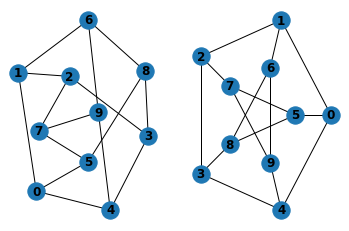

In [29]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

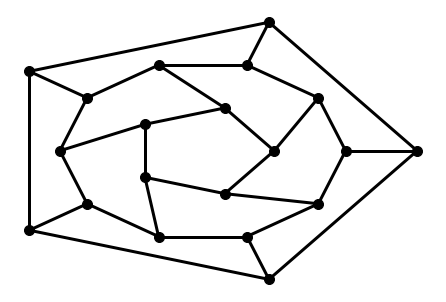

In [31]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)